In [48]:
# Plotting library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec

# Numerical Library
import numpy as np
from numpy import genfromtxt
from numpy.linalg import inv

# Image manipulation library
from PIL import Image

# Limit printout to 3 decimal places
np.set_printoptions(precision=3,suppress=True)

# Allows for printing inline for jupyter notebook
%matplotlib inline 

In [20]:
# Load datasets and store in ndarray
raw_train = genfromtxt('usps-4-9-train.csv', delimiter=',')
raw_test = genfromtxt('usps-4-9-test.csv', delimiter=',')

In [21]:
# Split off known target values
y_train = raw_train[:,256]
y_test = raw_test[:,256]

# Add dimension to y_train and transpose
y_train = y_train[np.newaxis].T
y_test = y_test[np.newaxis].T

# Remove column 256 from X
raw_train = np.delete(raw_train, 256, axis=1)
raw_test = np.delete(raw_test, 256, axis=1)

# Function to create array of dummy ones and returned 
# columnar vector
def make_dummy_vector(target):
    temp = np.ones(len(target))
    return temp[np.newaxis].T

# Create dummy 1 values
dummy_train = make_dummy_vector(X_train)
dummy_test = make_dummy_vector(X_test)

# Add dummy data to feature matrices
X_train = np.concatenate((dummy_train, raw_train), axis=1)
X_test = np.concatenate((dummy_test, raw_test), axis=1)

In [22]:
# Data for a single sample
print raw_train[0][np.newaxis]

[[   0.    0.    0.    0.    0.    0.    0.    0.   11.  133.  195.    7.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   12.  120.
   220.  255.  149.    2.    0.    0.    0.    0.    0.    0.    0.   20.
   113.  172.  239.  255.  255.   72.    0.    0.    0.    0.    0.    0.
     0.    0.  122.  255.  253.  174.  105.  155.  255.    3.    0.    0.
     0.    0.    0.    0.    0.   73.  243.  183.   17.    0.    0.  144.
   244.    2.    0.    0.    0.    0.   30.   28.    0.    0.    0.    0.
     0.    0.    0.   98.  201.    0.    0.   15.  102.  179.  255.  174.
     0.    0.    0.    0.    0.    0.    0.  155.  212.   90.  167.  253.
   255.  206.   94.   16.    0.    0.    0.    0.    0.    0.   25.  223.
   255.  239.  139.   64.   43.    0.    0.    0.    0.    0.    0.    0.
    37.  154.  251.  255.  166.   12.    0.    0.    0.    0.    0.    0.
     0.   22.  116.  205.  252.  173.   97.  255.  109.    0.    0.    0.
     0.    0.    0.    0.   90.  248. 

In [9]:
# Displays a single sample for context
def visualize_sample(data,target):
    temp = np.reshape(data[target][np.newaxis],(16,16))
    img = Image.fromarray(temp)
    img.show()
    
# Example call to function
visualize_sample(raw_train, 7)

In [31]:
# Compute optimal weight vector w = (X^T * X)^-1 (X^T * Y)
def calc_w_vector(X, y):
    return np.dot(inv(np.dot(X.T,X)), np.dot(X.T,y))

w_train = calc_w_vector(X_train,y_train)
w_test = calc_w_vector(X_test,y_test)

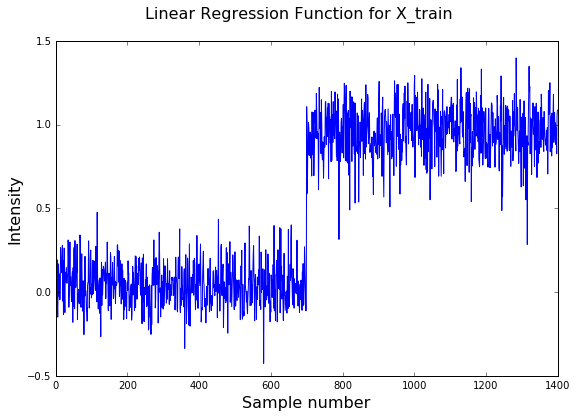

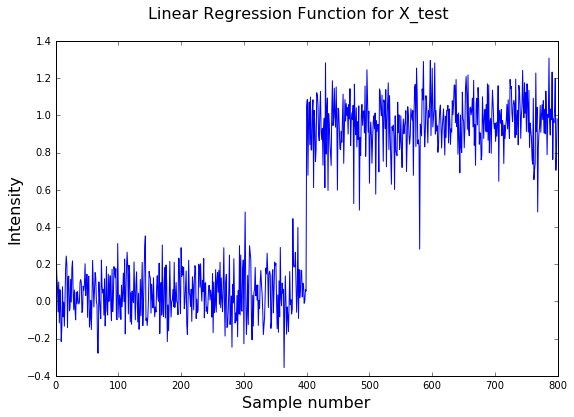

In [62]:
# Computer linear regression function
target_function_train = np.dot(X_train,w_train)
target_function_test = np.dot(X_test,w_test)

# Plot the values gathered above
fig = plt.figure(figsize=(9,6))
plt.plot(target_function_train)
fig.suptitle('Linear Regression Function for X_train', fontsize=16)
plt.xlabel('Sample number', fontsize=16)
plt.ylabel('Intensity', fontsize=16)

fig = plt.figure(figsize=(9,6))
plt.plot(target_function_test)
fig.suptitle('Linear Regression Function for X_test', fontsize=16)
plt.xlabel('Sample number', fontsize=16)
plt.ylabel('Intensity', fontsize=16)


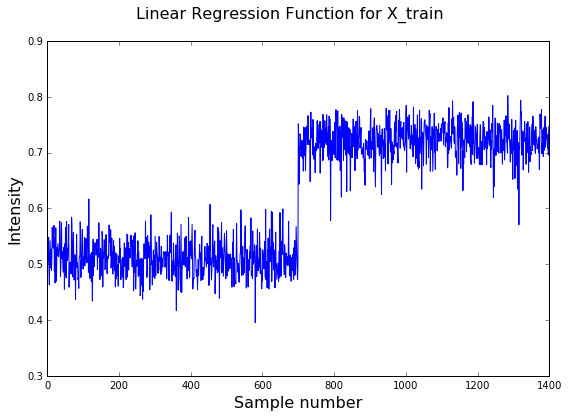

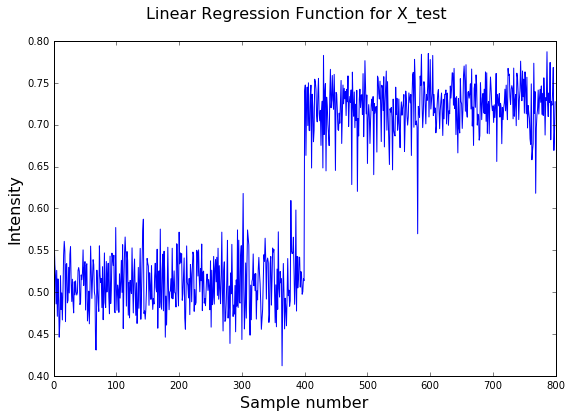

In [66]:
# Calculate sigmoid function
def calc_sigmoid(target_function):
    return (1 / (1 + np.exp(-target_function)))

sigmoid_train = calc_sigmoid(target_function_train)
sigmoid_test = calc_sigmoid(target_function_test)

# Plot the values gathered above
fig = plt.figure(figsize=(9,6))
plt.plot(sigmoid_train)
fig.suptitle('Linear Regression Function for X_train', fontsize=16)
plt.xlabel('Sample number', fontsize=16)
plt.ylabel('Intensity', fontsize=16)

fig = plt.figure(figsize=(9,6))
plt.plot(sigmoid_test)
fig.suptitle('Linear Regression Function for X_test', fontsize=16)
plt.xlabel('Sample number', fontsize=16)
plt.ylabel('Intensity', fontsize=16)